<center> 
    <h1> <font color = 'Blue'> CVEN5301 : Advanced Geospatial Analysis </h1>
 </center>

<center> 
    <h1> <font color = 'Black'> Project 2 </h1>
 </center>

<h2> <font color = 'purple'> Kushum KC </h2>

*Loading the libraries*

In [160]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import Point
from matplotlib import pyplot as plt
import matplotlib_map_utils as mapu


*Seting Working Directory*

In [161]:
path = r'C:\Users\kckus\OneDrive - Lamar University\0000Fall2024\AdGeospetial\Assignments\Project_2\WD'
os.chdir(path)
os.getcwd()

'C:\\Users\\kckus\\OneDrive - Lamar University\\0000Fall2024\\AdGeospetial\\Assignments\\Project_2\\WD'

<h3> <font color = 'red' >Problem 1:Create a 5 mile buffer around Jefferson County, TX and reproject it in AEA NAD83 CONUS 2011.</h3>

### Solution: 

*Load the Texas county GeoPackage*

In [162]:
county_path = os.path.join("JeffersonWGS84.gpkg")
gdf_Jefferson = gpd.read_file(county_path)
gdf_Jefferson = gdf_Jefferson.to_crs(epsg=4326)

*Reproject to Albers Equal Area*

In [163]:
gdf_Jeff_AEA = gdf_Jefferson .to_crs("EPSG:5070") 

*To create 5 miles buffer around Jefferson County (the projection system is in meters, convert miles to meters (1 mile = 1609.34 meters))*

In [164]:
buffer_distance_meters = 5 * 1609.34
gdf_Jefferson_buffer = gdf_Jeff_AEA.buffer(buffer_distance_meters)

*To plot the map of jefferson county after Buffer and Reprojection*

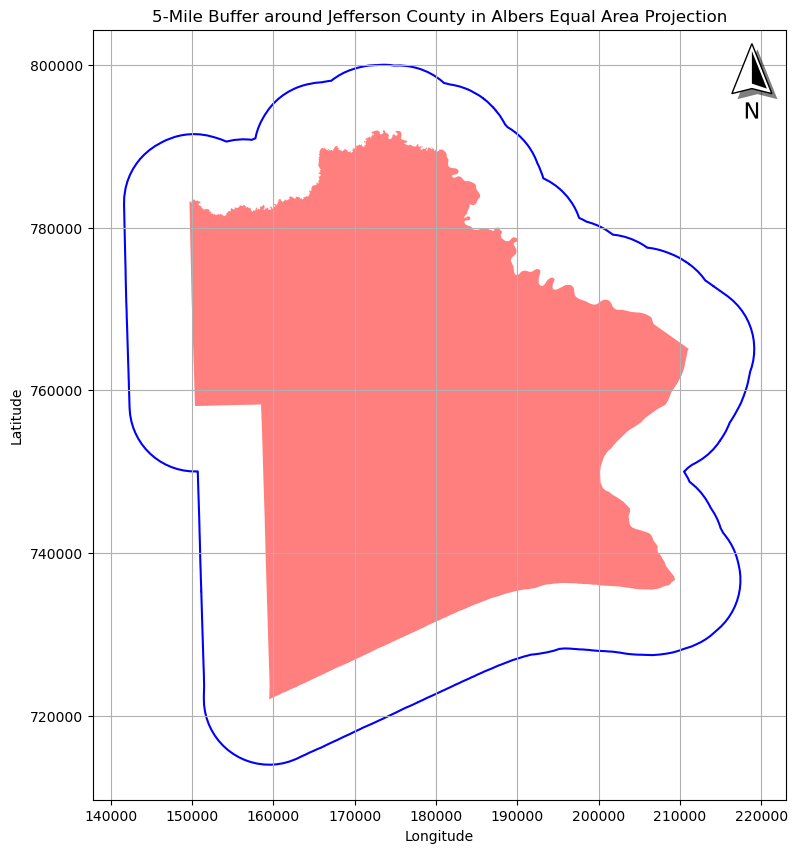

In [165]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_Jefferson_buffer.plot(ax=ax, edgecolor="blue", facecolor="none", linewidth=1.5)
gdf_Jeff_AEA.plot(ax=ax, color="red", alpha=0.5)                        # Plot original county in red for reference
plt.title("5-Mile Buffer around Jefferson County in Albers Equal Area Projection")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
mapu.north_arrow.north_arrow(ax=ax, location='upper right', rotation={"degrees": 0})
plt.grid()
plt.show()


<h3> <font color = 'red' >Problem 2: Join WellMain and Waterlevels major files.</h3>

*Get: lat-lon information (NAD83), Elevation of Land Surface Datum (LSD), depth below ground surface and water elevation (from MSL) into a single dataframe.*

### Solution: 

*Geting the information of the wells for the Jefferson county and the buffered area (Gulf Coast Aquifer area)*

In [166]:
WellMain_path = os.path.join(path, "WellMain.txt")
WaterLevelsMajor_path = os.path.join(path, "WaterLevelsMajor.txt")

# Loading files as DataFrames
df_wellmain = pd.read_csv(WellMain_path, delimiter="|", encoding='ISO-8859-1', low_memory=False)
df_waterlevels = pd.read_csv(WaterLevelsMajor_path, delimiter="|", encoding='ISO-8859-1', low_memory=False)

# Joining two DataFrames on a common column
combined_df = pd.merge(df_wellmain, df_waterlevels, on="StateWellNumber", how="outer")
combined_df.head(2)

,StateWellNumber,County_x,RiverBasin,GMA,RWPA,GCD,AquiferCode,AquiferCodeDescription,AquiferId,Aquifer_x,...,LandElevation,LandElevationMethod,WaterElevation,MeasurementNumber,MeasuringAgency,MethodOfMeasurement,Remarks_y,Comments,CreatedDate_y,LastUpdateDate_y
0,140301,Dallam,Canadian,1,A - Panhandle,North Plains GCD,121OGDP,"Ogallala Formation, Dakota Group and Purgatoir...",58,Ogallala/Rita Blanca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,140302,Dallam,Canadian,1,A - Panhandle,North Plains GCD,121OGDP,"Ogallala Formation, Dakota Group and Purgatoir...",58,Ogallala/Rita Blanca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Creating a Dataframe containing the Latitude, Longitude, Elevation of Land Surface Datum (LSD), depth below ground surface and Water Elevation (from MSL) for the wells.*

In [167]:
#combined_df.columns           #to check all column names in the dataframe

In [182]:
#selecting the columns for new dataframe
selected_columns = ['StateWellNumber', 'County_x', 'LatitudeDD', 'LongitudeDD', 'WellDepth', 'LandSurfaceElevation', 'DepthFromLSD', 'WaterElevation']

#Creating new dataframe with selected columns and cleaning the dataframe (drop na)
new_df = combined_df[selected_columns]
df = new_df.dropna()
df.head()

,StateWellNumber,County_x,LatitudeDD,LongitudeDD,WellDepth,LandSurfaceElevation,DepthFromLSD,WaterElevation
3,140901,Dallam,36.383611,-103.015,346.0,4669.0,73.00,4596.00
4,140901,Dallam,36.383611,-103.015,346.0,4669.0,77.00,4592.00
5,140901,Dallam,36.383611,-103.015,346.0,4669.0,79.10,4589.90
6,140901,Dallam,36.383611,-103.015,346.0,4669.0,76.63,4592.37
7,140901,Dallam,36.383611,-103.015,346.0,4669.0,87.70,4581.30


*Creating Geodataframe of Well Data (new datframe) and reprojecting it into AEA*

In [183]:
gdf_well = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['LongitudeDD'], df['LatitudeDD']), crs='EPSG:4326')
gdf_well_AEA = gdf_well.to_crs(epsg=5070)

*Visualizing the Area of Interest and all available Wells*

In [170]:
#fig, ax = plt.subplots(figsize=(10, 10))
#gdf_well_AEA.plot(ax=ax, color='red', markersize=1)
#gdf_Jefferson_buffer.plot(ax=ax, edgecolor='black', facecolor='none')
#plt.title("Wells and Texas County Boundaries")
#plt.show()

<h3> <font color = 'red' >Problem 3: Extracting wells within Area of Interest.</h3>

### Solution:

*Converting the buffered area (geoseries) to a GeoDataframe and then cliping the well within the buffered Area*

In [216]:
gdf_Jefferson_buffer2 = gpd.GeoDataFrame(geometry=gdf_Jefferson_buffer, crs=gdf_well_AEA.crs)

#Clipping using join
wells_in_area = gpd.sjoin(gdf_well_AEA, gdf_Jefferson_buffer2, how="inner", predicate="within")

*Plotting All wells within Area of Interest (Buffered Jefferson County)*

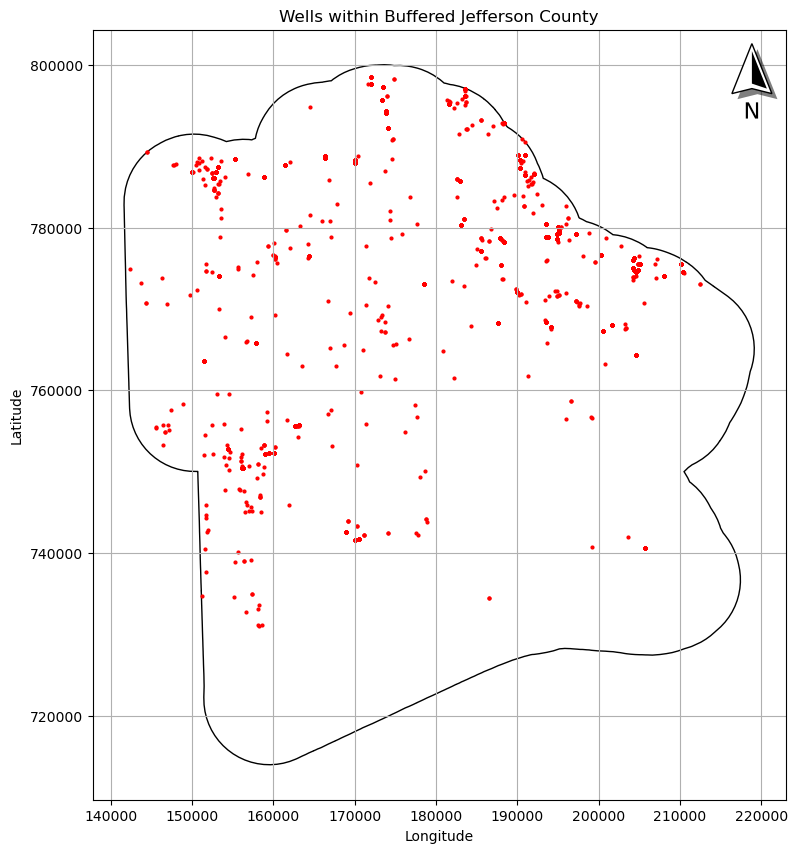

In [217]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_Jefferson_buffer.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1)
wells_in_area.plot(ax=ax, color='red', markersize=4)

plt.title("Wells within Buffered Jefferson County")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
mapu.north_arrow.north_arrow(ax=ax, location='upper right', rotation={"degrees": 0})
plt.grid()
plt.show()

<h3> <font color = 'red' >Problem 4: Average Water Level for Each Wells within the buffer.</h3>

### Solution:

In [201]:
wells_in_area.head()

,StateWellNumber,County_x,LatitudeDD,LongitudeDD,WellDepth,LandSurfaceElevation,DepthFromLSD,WaterElevation,geometry,index_right
942318,6153401,Hardin,30.169167,-94.498056,805.0,55.0,11.00,44.00,POINT (144459.158 789293.1),0
942319,6153401,Hardin,30.169167,-94.498056,805.0,55.0,20.00,35.00,POINT (144459.158 789293.1),0
942329,6153701,Hardin,30.155556,-94.461945,70.0,48.0,8.00,40.00,POINT (147956.52 787837.88),0
942330,6153702,Hardin,30.154445,-94.465556,988.0,45.0,55.00,-10.00,POINT (147611.174 787708.948),0
942332,6153703,Hardin,30.154167,-94.464444,980.0,45.0,30.52,14.48,POINT (147718.598 787679.786),0


*Filtering the unique wells present in the buffered area (grouped by the StateWellNumber)*

In [202]:
unique_wells = well_in_area.groupby('StateWellNumber').agg({
    'County_x': 'first',                  # Take the first value of 'County_x'
    'LatitudeDD': 'first',                # Take the first value of 'LatitudeDD'
    'LongitudeDD': 'first',               # Take the first value of 'LongitudeDD'
    'WellDepth': 'first',                 # Take the first value of 'WellDepth'
    'LandSurfaceElevation': 'mean',       # Calculate the mean of 'LandSurfaceElevation'
    'DepthFromLSD': 'mean',               # Calculate the mean of 'DepthFromLSD'
    'WaterElevation': 'mean',             # Calculate the mean of 'WaterElevation'
    'geometry': 'first'                   # Take the first geometry (assuming it doesn't vary within each well)
}).reset_index()

# Renaming the columns
unique_wells.rename(columns={'County_x': 'County', 'WaterElevation': 'WaterElevationAverage'}, inplace=True)

# Display the new GeoDataFrame
unique_wells.head()

,StateWellNumber,County,LatitudeDD,LongitudeDD,WellDepth,LandSurfaceElevation,DepthFromLSD,WaterElevationAverage,geometry
0,6153401,Hardin,30.169167,-94.498056,805.0,55.0,15.50,39.50,POINT (144459.158 789293.1)
1,6153701,Hardin,30.155556,-94.461945,70.0,48.0,8.00,40.00,POINT (147956.52 787837.88)
2,6153702,Hardin,30.154445,-94.465556,988.0,45.0,55.00,-10.00,POINT (147611.174 787708.948)
3,6153703,Hardin,30.154167,-94.464444,980.0,45.0,30.52,14.48,POINT (147718.598 787679.786)
4,6153801,Hardin,30.161389,-94.431667,180.0,48.0,9.80,38.20,POINT (150858.227 788532.924)


*Filtering the unique-wells for non-negative WaterElevationAverage and then converting to GeoDataframe (reprojection to AEA)*

In [212]:
unique_wells = unique_wells[unique_wells['WaterElevationAverage'] >= 0]

#len(unique_wells)

*Converting unique_wells to a GeoDataFrame*

In [213]:
unique_wells_gdf = gpd.GeoDataFrame(unique_wells, geometry=gpd.points_from_xy(unique_wells['LongitudeDD'], unique_wells['LatitudeDD']),
                    crs="EPSG:4326")
unique_wells_gdf = unique_wells_gdf.to_crs(gdf_Jefferson_buffer2.crs)

*Plotting the WaterElevationAverage for Visualization*

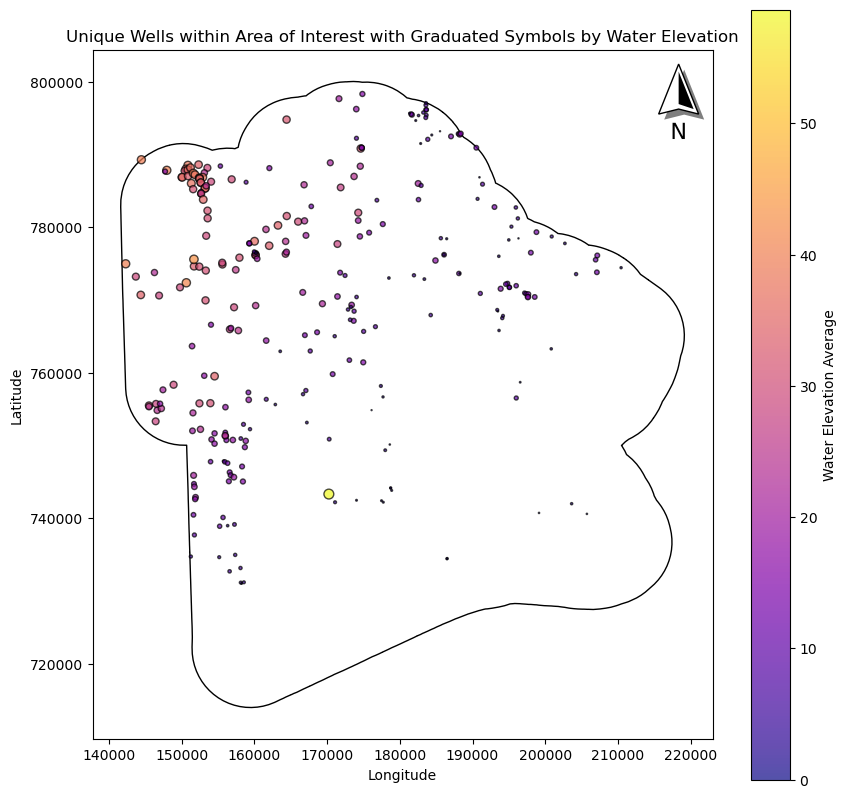

In [214]:
# Define a base marker size for scaling
base_marker_size = 50

# Plot the buffer area
fig, ax = plt.subplots(figsize=(10, 10))
gdf_Jefferson_buffer.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1)

# Plot unique wells as graduated symbols based on WaterElevationAverage
scatter = ax.scatter(
    unique_wells_gdf.geometry.x, 
    unique_wells_gdf.geometry.y,  
    s=base_marker_size * (unique_wells_gdf['WaterElevationAverage'] / unique_wells_gdf['WaterElevationAverage'].max()),  # Graduated size
    c=unique_wells_gdf['WaterElevationAverage'], 
    cmap='plasma', 
    edgecolor='black', 
    alpha=0.7
)

# Add colorbar for the WaterElevationAverage
cbar = fig.colorbar(scatter, ax=ax, label='Water Elevation Average')

# Titles and labels
plt.title("Unique Wells within Area of Interest with Graduated Symbols by Water Elevation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
mapu.north_arrow.north_arrow(ax=ax, location='upper right', rotation={"degrees": 0})
plt.show()

<h3> <font color = 'red' >Problem 5: Preparing Data for Regression.</h3>

### Solution:

*Converting the WaterElevationAverage from feet to meters*

In [208]:
unique_wells_gdf['WaterElevation_m'] = unique_wells_gdf['WaterElevationAverage'] * 0.3048

*Then creating a new DataFrame with x and y coordinates (in meters) and water elevation (in meters)*

In [209]:
wells_coordinates_m = pd.DataFrame({
    'X_Coordinate_m': unique_wells_gdf.geometry.x,
    'Y_Coordinate_m': unique_wells_gdf.geometry.y,
    'WaterElevation_m': unique_wells_gdf['WaterElevation_m']
})

wells_coordinates_m.head()

,X_Coordinate_m,Y_Coordinate_m,WaterElevation_m
0,144459.158011,789293.100296,12.039600
1,147956.520129,787837.879677,12.192000
3,147718.598145,787679.785671,4.413504
4,150858.227492,788532.923996,11.643360
5,150572.519390,788034.814217,10.698480


In [238]:
len(wells_coordinates_m)

287

<h3> <font color = 'red' >Problem 6: Linear Regression.</h3>

### Solution:

*Importing the library to perform the linear regression*

In [ ]:
import statsmodels.api as sm

*Linear Regresison Model using coordinates as the input variables (X) and Water Level as output variable (y).*

In [218]:
#Defining variables 
X = wells_coordinates_m[['X_Coordinate_m', 'Y_Coordinate_m']]
y = wells_coordinates_m['WaterElevation_m']

#Adding a constant (intercept) to the model (baseline value of water level when the independent variables are zero)
X = sm.add_constant(X)

#fitting the regression model
model = sm.OLS(y, X).fit()
print(model.summary())           #to get the summary of the regression Model

                            OLS Regression Results                            
Dep. Variable:       WaterElevation_m   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     173.1
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           6.95e-50
Time:                        15:40:13   Log-Likelihood:                -647.23
No. Observations:                 287   AIC:                             1300.
Df Residuals:                     284   BIC:                             1311.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -36.5474      6.182     -5.

<h3> <font color = 'red' >Problem 7: Direction of GroundwaterFlow.</h3>

### Solution:

*Getting the coefficients from the Linear regression and calculating the gradient.*

In [230]:
G_x = model.params['X_Coordinate_m']
G_y = model.params['Y_Coordinate_m']

#print("G_x (Coefficient for X_Coordinate_m):", G_x)
#print("G_y (Coefficient for Y_Coordinate_m):", G_y)

# Gradient angle calculation (in degrees) 
theta = np.degrees(np.arctan2(G_y, G_x))
print("Gradient angle (relative to x-axis):", round(theta, 2), "degrees")

Gradient angle (relative to x-axis): 149.13 degrees


*Calculating the flow direction (add 180 degrees to reverse direction, as flow direction is reverse of the gradient angle)*

In [231]:
flow_direction = (theta + 180) % 360                          # % 360 is to keep within 0-360 range
print("Direction of Gradient:", round(theta, 2), "degrees")
print("Direction of Grounwater Flow:", round(flow_direction, 2), "degrees")

Direction of Gradient: 149.13 degrees
Direction of Grounwater Flow: 329.13 degrees


*Magnitude of the gradient (i)*

In [243]:
Gradient_i = np.sqrt((G_x * G_x) + (G_y * G_y))
print("Gradient_i:", Gradient_i)

Gradient_i: 0.0001662762867818529


<h3> <font color = 'red' >Problem 8: Obtain hydraulic conductivity in m/d using a depth B of 100 ft, the relation T = KB and given Tvalues.</h3>

### Solution:

*First Loading the csv for the T values in a dataframe and defining variable B with given vale 100 ft*

In [236]:
df = pd.read_csv('Tvalues.csv')
df['T_convert'] = df['T'] * 0.01242      # converting gallon/feet/day to m3/m/day

B_meter = 100 *0.3048      
df.head()

,WellID,Lon,Lat,T,Source,T_convert
0,1,-94.071944,30.065000,55200,https://www.twdb.texas.gov/publications/report...,685.584
1,2,-94.035278,30.066667,13100,https://www.twdb.texas.gov/publications/report...,162.702
2,3,-94.046389,30.064167,18000,https://www.twdb.texas.gov/publications/report...,223.560
3,4,-94.073889,30.060556,18300,https://www.twdb.texas.gov/publications/report...,227.286
4,5,-94.073889,30.066389,16300,https://www.twdb.texas.gov/publications/report...,202.446


*For the Values of T on every unique well in the AOI (buffered Jefferson County), the known values of T for known coordinates is used and IDW (Inverse Distance Weighting) method is used.*

In [248]:
known_coords = df[['Lon', 'Lat']].values
known_T_values = df['T_convert'].values

*Extract the coordinate values of the unique wells in the buffered jefferson county.*

In [253]:
unique_wells_gdf = gpd.GeoDataFrame(unique_wells, geometry=gpd.points_from_xy(unique_wells['LongitudeDD'], unique_wells['LatitudeDD']),
                    crs="EPSG:4326")

wells_coords_lon_lat = unique_wells_gdf[['LongitudeDD', 'LatitudeDD']].values            #Extracting the value of wells' longitude and latitude 

unique_wells_gdf.head()

,StateWellNumber,County,LatitudeDD,LongitudeDD,WellDepth,LandSurfaceElevation,DepthFromLSD,WaterElevationAverage,geometry
0,6153401,Hardin,30.169167,-94.498056,805.0,55.0,15.50,39.50,POINT (-94.49806 30.16917)
1,6153701,Hardin,30.155556,-94.461945,70.0,48.0,8.00,40.00,POINT (-94.46194 30.15556)
3,6153703,Hardin,30.154167,-94.464444,980.0,45.0,30.52,14.48,POINT (-94.46444 30.15417)
4,6153801,Hardin,30.161389,-94.431667,180.0,48.0,9.80,38.20,POINT (-94.43167 30.16139)
5,6153802,Hardin,30.156945,-94.434722,480.0,47.0,11.90,35.10,POINT (-94.43472 30.15694)


*IDW method for values of T in each unique well*

In [254]:
# Defining IDW interpolation function
def idw_interpolation(target_coords, known_coords, known_values, power=2):
    interpolated_values = []
    for target in target_coords:
        distances = np.linalg.norm(known_coords - target, axis=1)          # calculates distances from the target point to all known points
        distances[distances == 0] = 1e-10                                  # replacing zero distances with a small value
        weights = 1 / (distances ** power)                                 # calculates weights using the inverse distance formula
        interpolated_value = np.sum(weights * known_values) / np.sum(weights)  
        interpolated_values.append(interpolated_value)
    return np.array(interpolated_values)

# IDW interpolation for the wells coordinates
interpolated_T_idw = idw_interpolation(wells_coords_lon_lat, known_coords, known_T_values, power=2)

#Creating a Dataframe for Interpolated T values in wells_coordinates
unique_wells_gdf['T_idw'] = interpolated_T_idw

unique_wells_gdf.head()

,StateWellNumber,County,LatitudeDD,LongitudeDD,WellDepth,LandSurfaceElevation,DepthFromLSD,WaterElevationAverage,geometry,T_idw
0,6153401,Hardin,30.169167,-94.498056,805.0,55.0,15.50,39.50,POINT (-94.49806 30.16917),297.866925
1,6153701,Hardin,30.155556,-94.461945,70.0,48.0,8.00,40.00,POINT (-94.46194 30.15556),298.631829
3,6153703,Hardin,30.154167,-94.464444,980.0,45.0,30.52,14.48,POINT (-94.46444 30.15417),298.469511
4,6153801,Hardin,30.161389,-94.431667,180.0,48.0,9.80,38.20,POINT (-94.43167 30.16139),300.239126
5,6153802,Hardin,30.156945,-94.434722,480.0,47.0,11.90,35.10,POINT (-94.43472 30.15694),299.906918


*Now computing the value of K in meter per day by using equation K= T/B*

In [256]:
unique_wells_gdf['K_idw_m_per_day'] = (unique_wells_gdf['T_idw'] / B_meter) 

# Display the resulting DataFrame with interpolated T and calculated K values
unique_wells_gdf.head()

,StateWellNumber,County,LatitudeDD,LongitudeDD,WellDepth,LandSurfaceElevation,DepthFromLSD,WaterElevationAverage,geometry,T_idw,K_idw_m_per_day
0,6153401,Hardin,30.169167,-94.498056,805.0,55.0,15.50,39.50,POINT (-94.49806 30.16917),297.866925,9.772537
1,6153701,Hardin,30.155556,-94.461945,70.0,48.0,8.00,40.00,POINT (-94.46194 30.15556),298.631829,9.797632
3,6153703,Hardin,30.154167,-94.464444,980.0,45.0,30.52,14.48,POINT (-94.46444 30.15417),298.469511,9.792307
4,6153801,Hardin,30.161389,-94.431667,180.0,48.0,9.80,38.20,POINT (-94.43167 30.16139),300.239126,9.850365
5,6153802,Hardin,30.156945,-94.434722,480.0,47.0,11.90,35.10,POINT (-94.43472 30.15694),299.906918,9.839466


<h3> <font color = 'red' >Problem 9: Quiver plot of Groundwater flow directions using Darcy’s law which states (q = -Ki) where K is the hydraulic conductivity and ‘i’ is the hydraulic gradient.</h3>

### Solution:

*Calculating q using Darcy's law, q = -K * i*

In [277]:
unique_wells_gdf['q'] = -unique_wells_gdf['K_idw_m_per_day'] * Gradient_i

In [ ]:
*Calculating the x and y components of q by using the value o theta (radian)

In [278]:
theta_radians = np.radians(theta)

#x and y components of q
unique_wells_gdf['q_x'] = unique_wells_gdf['q'] * np.cos(theta_radians)
unique_wells_gdf['q_y'] = unique_wells_gdf['q'] * np.sin(theta_radians)

*Extracting the values of x, y coordinates (longitude, latitude) and the flow components (q_x, q_y)*

In [279]:
x_coords = unique_wells_gdf['LongitudeDD'].values
y_coords = unique_wells_gdf['LatitudeDD'].values
q_x = unique_wells_gdf['q_x'].values
q_y = unique_wells_gdf['q_y'].values

*Quiver Plot visualization of the Ground water flow direction of wells.*

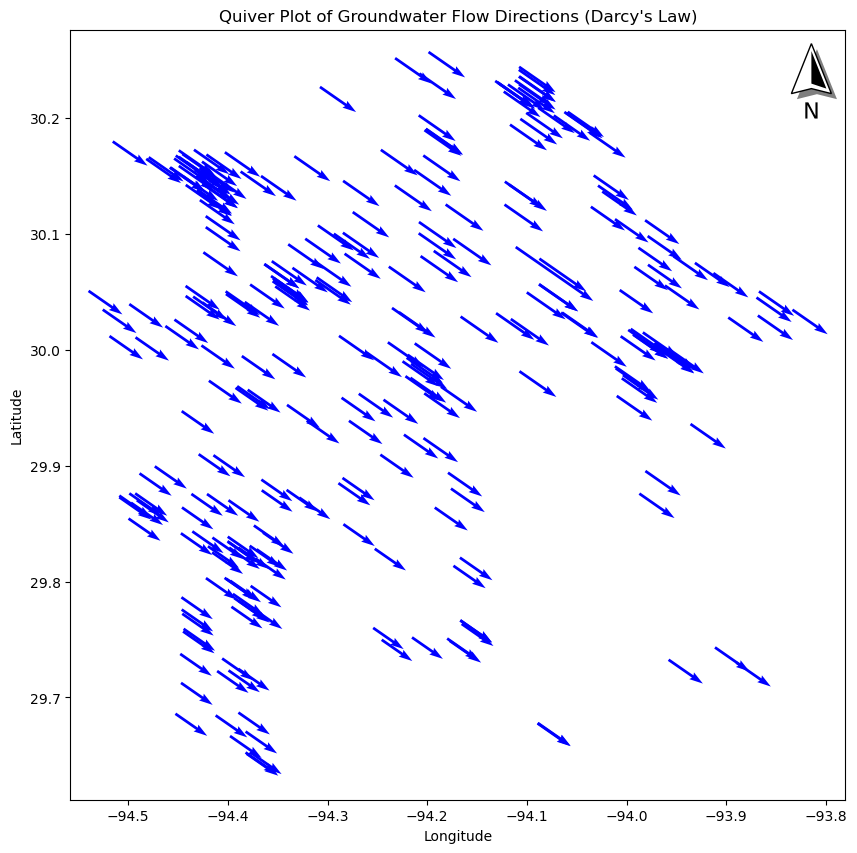

In [280]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.quiver(x_coords, y_coords, q_x, q_y, angles='xy', scale_units='xy', scale=0.04, color='blue', pivot='middle')
ax.set_title("Quiver Plot of Groundwater Flow Directions (Darcy's Law)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
mapu.north_arrow.north_arrow(ax=ax, location='upper right', rotation={"degrees": 0})
plt.show()

<h3> <font color = 'red' >Problem 10: Quiver plot of Groundwater flow directions on the Map of Jefferson County Buffer.</h3>

### Solution:

*Quiver Plot of the Ground water flow direction of wells with the jefferson county buffer.*

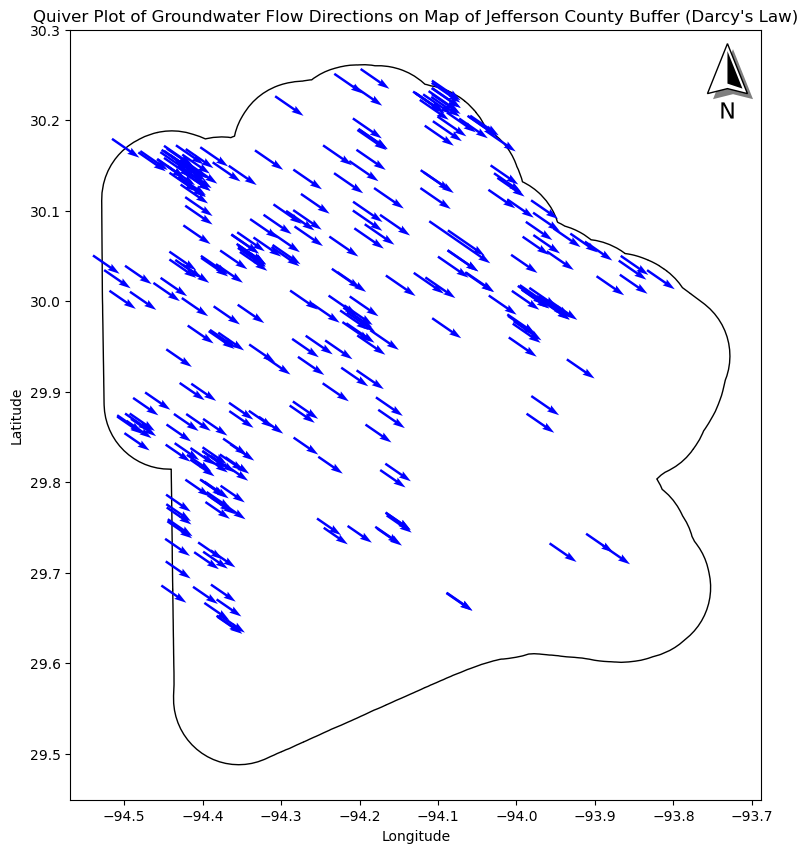

In [283]:
#Buffered Jefferson County in WGS84 Projection system
gdf_Jefferson_buffer_WGS84= gdf_Jefferson_buffer .to_crs("EPSG:4326") 

#Crate the plot and Plot Quiver and Buffered Jefferson Boarder
fig, ax = plt.subplots(figsize=(10, 10))
gdf_Jefferson_buffer_WGS84.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1)
ax.quiver(x_coords, y_coords, q_x, q_y, angles='xy', scale_units='xy', scale=0.04, color='blue', pivot='middle')
ax.set_title("Quiver Plot of Groundwater Flow Directions on Map of Jefferson County Buffer (Darcy's Law)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
mapu.north_arrow.north_arrow(ax=ax, location='upper right', rotation={"degrees": 0})
plt.show()

## Closing Statement

This project provided an in-depth geospatial analysis of groundwater characteristics in Jefferson County, Texas, using advanced geospatial techniques and tools. The analysis began by creating a 5-mile buffer around Jefferson County and reprojecting it using the Albers Equal Area (AEA) NAD83 CONUS 2011 system, ensuring accurate spatial representation. Well data was then integrated with water level measurements, allowing for comprehensive spatial analysis.

Key tasks included extracting well information within the buffered area, calculating average water levels, and assessing spatial trends. Through linear regression, the gradient and flow direction of groundwater were determined, revealing the predominant flow paths. Hydraulic conductivity was estimated using the provided transmissivity values and the Inverse Distance Weighting (IDW) method. Darcy’s law was applied to visualize groundwater flow directions, confirming expected flow patterns towards lower elevation areas.

The findings were effectively visualized through quiver plots overlaid on the buffered region, demonstrating the groundwater flow dynamics. This analysis provided critical insights into the behavior of groundwater within Jefferson County, highlighting the value of integrating well data with geospatial techniques.

Overall, this project serves as a practical example of using geospatial analysis to inform groundwater management decisions. It underscores the importance of accurate data integration and advanced spatial modeling in understanding subsurface hydrological processes, with potential applications in environmental assessment and water resource planning for similar regions.